<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_linearis_algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lineáris algebra

A lineáris algebra a sokváltozós lineáris egyenletrendszerek megoldásával, illetve megoldhatóságának vizsgálatával foglalkozik. 

A lineáris algebra gyakorlati jelentősége abban mutatkozik meg, hogy számos bonyolult matematikai probléma numerikus megoldása sok esetben egy sok (esetenként igen sok, akár több millió) ismeretlenes lineáris egyenletrendszerre vezet. 

Az alábbiakban a `numpy` csomag lineáris algebrai rutinjaival fogunk megismerkedni. Először a `matrix` típust vizsgáljuk meg, mely segítségével egszerű vektor-mátrix műveletek tömören fogalmazhatóak meg. 

Ezután a `solve` lineáris egyenletrendszereket megoldó függvény használatát sajátítjuk el, végül az `eig` sajátérték-, illetve sajátvektor-kereső rutinnal ismerkedünk meg. 

In [0]:
# A szokásos import
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Mátrixok és mátrix vektor műveletek

A korábbiakban rendszeresen használtuk a `numpy` csomag `array` válltozóit. Ezek sok szempontból hasznosnak bizonyultak, de alapvetően táblázatként működtek, és nem a lineáris algebrában megszokott mátrixként. Ennek a legszembetűnőbb megnyilvánulása az, hogy a rájuk értelmezett műveletek szigorúan elemenként értendőek voltak. Azaz a `*` elemenkénti szorzást és nem mátrixszorzást jelent. Például az alább definiált `A` és `B` tömbök

In [0]:
# két minta array
A=array([[1,2],
         [3,4]])

B=array([[2,2],
         [2,2]])


egymással összeszorozva egy olyan `array` -t adnak végeredményül, amelynek elemei az `A` és a `B` elemeinek szorzata: 
$$ (A*B)_{ij}=A_{ij}*B_{ij} $$

In [0]:
A*B

array([[2, 4],
       [6, 8]])

Ez a művelet természetesen nem érzékeny a műveleti sorrendre, azaz `A*B=B*A`:

In [0]:
B*A

array([[2, 4],
       [6, 8]])

A `numpy` rendelkezik egy `matrix` típussal is, ami sok szempontból hasonlóan viselkedik, mint az `array`, de bizonyos műveletek, például a \* is a lineáris algebrában megszokott módon van definiálva. Azaz itt a \*-jel az alábbiakat jelenti:
$$ (A*B)_{ij}=\sum_l A_{il}B_{lj} $$

A `matrix()`-függvény  `array` vagy `list` típusú változókból `matrix` típusú változókat csinál:

In [0]:
# Így definiálunk mátrixokat
Am=matrix(A)
Bm=matrix(B)

Figyeljük meg, hogy az `Am` és `Bm` változókra miként hat a * művelet:

In [0]:
Am*Bm

matrix([[ 6,  6],
        [14, 14]])

In [0]:
Bm*Am

matrix([[ 8, 12],
        [ 8, 12]])

A szorzás eredménye tehát ahogy vártuk, függ a műveleti sorrendtől!

Nézzünk meg egypár hasznos lineáris algebrai mátrixműveletet:

In [0]:
Am.T  # Ez az Am mátrix transzponáltja

matrix([[1, 3],
        [2, 4]])

In [0]:
Am+1.0j*Bm #Ez egy komplex mátrix

matrix([[ 1.+2.j,  2.+2.j],
        [ 3.+2.j,  4.+2.j]])

In [0]:
(Am+1.0j*Bm).H  # Ez a komplex  mátrix adjungáltja, azaz a transzponált konjugáltja

matrix([[ 1.-2.j,  3.-2.j],
        [ 2.-2.j,  4.-2.j]])

In [0]:
trace(Am) # A mátrix nyoma, (vagy spur-ja) azaz a diagonális elemek összege

5

In [0]:
trace(A) # A trace ugyan úgy működik array-ekre

5

In [0]:
det(Am) # A mátrix determinánsa

-2.0000000000000004

In [0]:
det(A) # A determináns is alkalmazható array-ekre

-2.0000000000000004

In [0]:
inv(Am) # A mátrix inverze.. ugyebár ez nem feltétlenül létezik

matrix([[-2. ,  1. ],
        [ 1.5, -0.5]])

In [0]:
inv(A) # Ez is megy array -ekre

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [0]:
inv(Am)*Am # Ennek egységnek kell lennie

matrix([[  1.00000000e+00,   0.00000000e+00],
        [  2.22044605e-16,   1.00000000e+00]])

## Lineáris egyenletrendszerek

Az egyik gyakran előforduló lineáris algebrai feladat az egyenletrendszerek megoldása. Például keressük azt az $x$ vektort amely teljesíti a

$$ \mathbf{A}x=b$$

egyenletet, ahol $\mathbf{A}$ egy ismert mátrix és $b$ egy ismert vektor. A `numpy` csomag az ilyen formában megadott egyenletrendszer megoldására a `solve` függvényt kínálja. 

**Fgyelem**: ez a függvény nem keverendő össze a `sympy` csomag azonos nevű függvényével, amely tetszőleges algebrai egyenletrendszerre kínál analitikus megoldást. A `numpy` modul `solve` függvénye szigorúan csak numerikus lineáris algebrai feladatok megoldására alkalmas!

Vizsgáljuk meg egy példát ! Keressük meg azt a síkbeli vektort, amit ha $\varphi=30^\circ$-al az óra járásával megegyező irányban elforgatunk, akkor az $y$ irányú egységvektort kapjuk! 
Azaz 

$$A=\begin{pmatrix}
\cos(\varphi) & -\sin(\varphi)\\ 
\sin(\varphi) & \cos(\varphi)
\end{pmatrix}$$ valamint
$$b=\begin{pmatrix}
0 \\ 
1    
\end{pmatrix}$$

In [0]:
# az ismert mennyiségek definiálása:
phi=pi/6;
#Ez az A mátrix
A=matrix([[cos(phi), -sin(phi)],
         [sin(phi),  cos(phi)]])
#Ez pedig a b oszlopvektor, figyeljünk a zárójelezésre!!!
b=matrix([[0],
          [1]])

In [0]:
x=solve(A,b)

In [0]:
x

matrix([[ 0.5      ],
        [ 0.8660254]])

## Sajátérték-probléma

A másik sokszor felmerülő lineáris algebrai problémakör egy mátrix sajátértékeinek és sajátvektorainak meghatározása. Legyen $A$ egy ismert mátrix, és keressük tehát azon $x$ vektorokat, illetve azon $\lambda$ számokat, melyek teljesítik az alábbi feltételt.

$$ \mathbf{M}x=\lambda x.$$

Ilyen jellegű problémákat az `eig` rutin segítségével tudunk megoldani. Lássunk erre is egy példát!
Legyen $M$ egy 10x10-es mátrix, melynek mindkét első mellékátlója -1, a többi elem pedig nulla!

In [0]:
M=matrix(zeros((10,10))) # Így gyártunk egy 10x10-es üres mátrixot.
for i in range(9):#A mellékátlók 1-el rövidebbek mint a mátrix mérete!
    M[i,i+1]=-1.0 #A mellékátlók feltöltése -1 -el
    M[i+1,i]=-1.0 


In [0]:
M # nézzük meg a mátrixot

matrix([[ 0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [-1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., -1.,  0., -1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  0., -1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -1.,  0., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0., -1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.]])

A sajátérték-probléma megoldása:

In [0]:
ertek,vektor=eig(M)

Most az `ertek` valtozó tartalmazza a saját értékeket illetve a `vektor` a sajátvektorokat.

In [0]:
ertek

array([-1.91898595, -1.68250707, -1.30972147, -0.83083003, -0.28462968,
        0.28462968,  1.91898595,  1.68250707,  1.30972147,  0.83083003])

In [0]:
vektor

matrix([[-0.12013117,  0.23053002,  0.3222527 ,  0.38786839, -0.42206128,
         -0.42206128, -0.12013117, -0.23053002, -0.3222527 ,  0.38786839],
        [-0.23053002,  0.38786839,  0.42206128,  0.3222527 , -0.12013117,
          0.12013117,  0.23053002,  0.38786839,  0.42206128, -0.3222527 ],
        [-0.3222527 ,  0.42206128,  0.23053002, -0.12013117,  0.38786839,
          0.38786839, -0.3222527 , -0.42206128, -0.23053002, -0.12013117],
        [-0.38786839,  0.3222527 , -0.12013117, -0.42206128,  0.23053002,
         -0.23053002,  0.38786839,  0.3222527 , -0.12013117,  0.42206128],
        [-0.42206128,  0.12013117, -0.38786839, -0.23053002, -0.3222527 ,
         -0.3222527 , -0.42206128, -0.12013117,  0.38786839, -0.23053002],
        [-0.42206128, -0.12013117, -0.38786839,  0.23053002, -0.3222527 ,
          0.3222527 ,  0.42206128, -0.12013117, -0.38786839, -0.23053002],
        [-0.38786839, -0.3222527 , -0.12013117,  0.42206128,  0.23053002,
          0.23053002, -0.3878683

Az $i$-edik sajátvektort a `vektor` változó `i`-edik oszlopa, `vektor[:,i]` tartalmazza.

Ez a sajátvektor az $i$-edik, `ertek[i]` sajátértékhez tartozó megoldása az $Mx=\lambda x$ sajátérték-problémának.

Ellenőrizzük ezt le:

In [0]:
#ez tehát a nullvektor kell hogy legyen:
M*vektor[:,3]-vektor[:,3]*ertek[3]

matrix([[ -1.66533454e-16],
        [ -8.32667268e-16],
        [  8.32667268e-17],
        [  1.11022302e-16],
        [  3.60822483e-16],
        [  3.88578059e-16],
        [  2.77555756e-16],
        [  5.55111512e-17],
        [ -2.77555756e-16],
        [ -1.11022302e-16]])

Jelenítsük meg a két legkisebb sajátértékhez tartozó sajátfüggvényt!

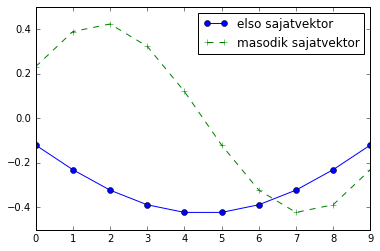

In [0]:
plot(vektor[:,0],'o-',label='elso sajatvektor')
plot(vektor[:,1],'+--',label='masodik sajatvektor')
legend()

Vajon miért néznek így ki ezek a sajátfüggvények ? 